# 5.3 Zastosowanie drzew decyzyjnych do detekcji anomalii

In [1]:
import pandas as pd

In [2]:
seismic_bump_df = pd.read_parquet("../data/seismic_bumps_df.parquet")
seismic_bump_df.sample(5)

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,...,seismic_b,seismoacoustic_a,seismoacoustic_b,seismoacoustic_c,shift_N,shift_W,ghazard_a,ghazard_b,ghazard_c,class
2324,33780.0,525.0,18.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,False,False,True,True,False,False,0
1850,11330.0,204.0,9.0,-46.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,True,False,True,False,False,True,False,0
2446,1330.0,54.0,-88.0,-76.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,True,False,False,0
2540,16940.0,288.0,47.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,True,False,False,False,True,True,False,False,0
1862,11920.0,141.0,21.0,-60.0,1.0,1.0,0.0,0.0,0.0,800.0,...,False,False,True,False,True,False,True,False,False,0


In [3]:
X = seismic_bump_df.drop(columns="class")
y = seismic_bump_df["class"]

In [4]:
from sklearn.ensemble import IsolationForest

In [5]:
iforest = IsolationForest(n_estimators=1000,
                          bootstrap=True,
                          max_features=2,
                          random_state=9124106)
iforest.fit(X)

IsolationForest(bootstrap=True, max_features=2, n_estimators=1000,
                random_state=9124106)

In [6]:
seismic_bump_df["anomaly_score"] = iforest.score_samples(X)

In [7]:
seismic_bump_df.sample(5)

,genergy,gpuls,gdenergy,gdpuls,nbumps,nbumps2,nbumps3,nbumps4,nbumps5,energy,...,seismoacoustic_a,seismoacoustic_b,seismoacoustic_c,shift_N,shift_W,ghazard_a,ghazard_b,ghazard_c,class,anomaly_score
2095,5470.0,237.0,-56.0,-5.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,True,False,True,False,False,0,-0.430858
426,59300.0,690.0,53.0,70.0,6.0,1.0,5.0,0.0,0.0,25700.0,...,False,True,False,False,True,True,False,False,0,-0.542785
1568,21060.0,588.0,-37.0,-36.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,False,True,False,True,False,1,-0.460695
1198,19760.0,445.0,114.0,101.0,0.0,0.0,0.0,0.0,0.0,0.0,...,False,True,False,True,False,True,False,False,0,-0.457566
2432,12200.0,580.0,105.0,310.0,0.0,0.0,0.0,0.0,0.0,0.0,...,True,False,False,True,False,False,True,False,0,-0.491926


<Axes: title={'center': 'anomaly_score'}, xlabel='class'>

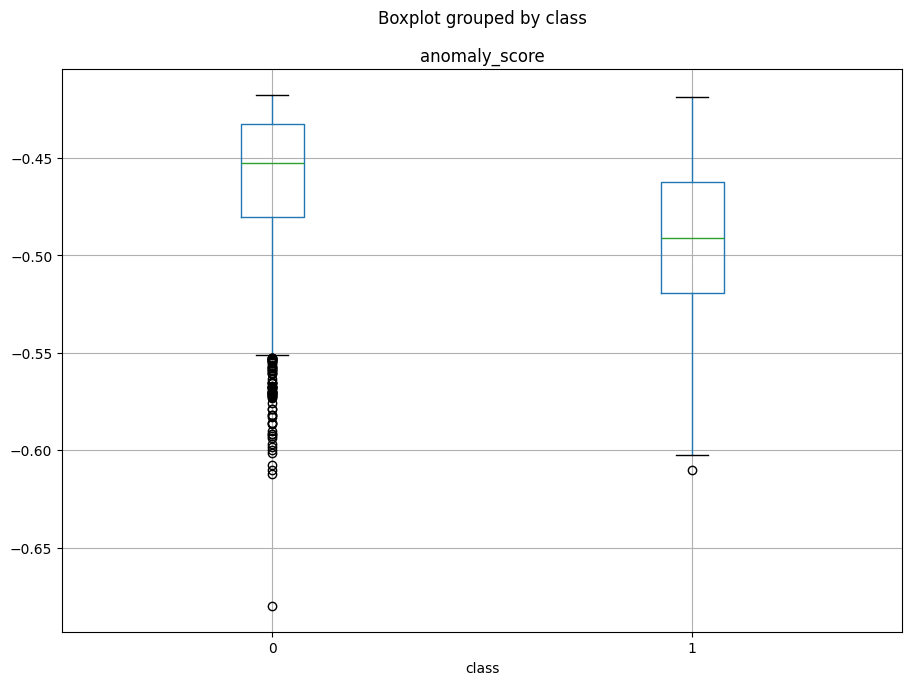

In [8]:
seismic_bump_df.boxplot(column="anomaly_score", by="class", figsize=(10.5, 7.5))

In [9]:
seismic_bump_df.groupby("class").describe()["anomaly_score"]

,count,mean,std,min,25%,50%,75%,max
class,,,,,,,,
0,2414.0,-0.461613,0.036290,-0.680092,-0.480478,-0.452699,-0.432754,-0.417595
1,170.0,-0.492993,0.044117,-0.610105,-0.519363,-0.491193,-0.462197,-0.418489


Teoretycznie średnia dla klasy "1" jest mniejsza niż dla "0", jednak są to różnice zaniedbywalne, więc niestety, ale metoda *Isolation Forest* nie do końca poradziła sobie z rozwiązaniem tego problemu. Sprawdźmy jeszcze jak wyglądają przykładowe konfiguracje drzew.

In [10]:
iforest.estimators_


[ExtraTreeRegressor(max_depth=8, max_features=1, random_state=2121930668),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=249022410),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1321840480),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1361512375),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=297701010),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1714988811),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=642311436),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=382660894),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=2003905087),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=412451558),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=28720847),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=648175434),
 ExtraTreeRegressor(max_depth=8, max_features=1, random_state=1223031115),
 ExtraTreeRegressor(max_depth=8, 